#  Analysis of US Economic Data & Building a Dashboard

## Overview:
Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, we will extract some essential economic indicators from some data and then display these economic indicators in a Dashboard. We can then share the dashboard via a URL.

<b>Gross domestic product (GDP)</b> is a measure of the market value of all the final goods and services produced in a period. GDP is an indicator of how well the economy is doing. A drop in GDP indicates the economy is producing less; similarly an increase in GDP suggests the economy is performing better. In this project, we will examine how changes in GDP impact the unemployment rate by using data visualizations such as Line and Bar Charts or by finding a correlation between GDP & unemployment rate.

<a id='toc'></a>
## Table of Content:

[1. Data Collection](#l1)<br>
[2. Data Understanding](#l2)<br>
[3. Data Cleaning](#l3)<br>
[4. Data Visualization](#l4)<br>
[5. Comparison between GDP V/S Unemployment](#l5)<br>
[6. Creating Dashboard](#l6)<br><br>
[Conclusion](#conclusion)

<a id='l1'></a>
## 1. Data Collection

### (i) Read GDP Table

In [40]:
import pandas as pd

In [41]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/projects/coursera_project/clean_gdp.csv'
gdp = pd.read_csv(url)
gdp.head()

,date,level-current,level-chained,change-current,change-chained
0,1948,274.8,2020.0,-0.7,-0.6
1,1949,272.8,2008.9,10.0,8.7
2,1950,300.2,2184.0,15.7,8.0
3,1951,347.3,2360.0,5.9,4.1
4,1952,367.7,2456.1,6.0,4.7


### (ii) Read Unemployment Table

In [42]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/projects/coursera_project/clean_unemployment.csv'
unemployment = pd.read_csv(url)
unemployment.head()

,date,unemployment
0,1948,3.750000
1,1949,6.050000
2,1950,5.208333
3,1951,3.283333
4,1952,3.025000


[Table of Content](#toc)

<a id='l2'></a>
## 2. Data Understanding

### (i) Understand GDP Table

In [43]:
gdp.head()

,date,level-current,level-chained,change-current,change-chained
0,1948,274.8,2020.0,-0.7,-0.6
1,1949,272.8,2008.9,10.0,8.7
2,1950,300.2,2184.0,15.7,8.0
3,1951,347.3,2360.0,5.9,4.1
4,1952,367.7,2456.1,6.0,4.7


In [44]:
gdp.columns

Index(['date', 'level-current', 'level-chained', 'change-current',
       'change-chained'],
      dtype='object')

In [45]:
gdp.describe()

,date,level-current,level-chained,change-current,change-chained
count,69.000000,69.000000,69.000000,69.000000,69.000000
mean,1982.000000,5664.008696,7957.673913,6.424638,3.184058
std,20.062403,5692.268651,4585.249853,3.200616,2.341168
min,1948.000000,272.800000,2008.900000,-1.800000,-2.500000
25%,1965.000000,743.700000,3976.700000,4.300000,1.900000
50%,1982.000000,3345.000000,6617.700000,6.000000,3.200000
75%,1999.000000,9660.600000,12065.900000,8.400000,4.600000
max,2016.000000,18624.500000,16716.200000,15.700000,8.700000


In [46]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 5 columns):
date              69 non-null int64
level-current     69 non-null float64
level-chained     69 non-null float64
change-current    69 non-null float64
change-chained    69 non-null float64
dtypes: float64(4), int64(1)
memory usage: 2.8 KB


In [47]:
gdp.dtypes

date                int64
level-current     float64
level-chained     float64
change-current    float64
change-chained    float64
dtype: object

### (ii) Understand Unemployment Table

In [48]:
unemployment.head()

,date,unemployment
0,1948,3.750000
1,1949,6.050000
2,1950,5.208333
3,1951,3.283333
4,1952,3.025000


In [49]:
unemployment.tail()

,date,unemployment
64,2012,8.075000
65,2013,7.358333
66,2014,6.158333
67,2015,5.275000
68,2016,4.875000


In [50]:
unemployment.columns

Index(['date', 'unemployment'], dtype='object')

In [51]:
unemployment.describe()

,date,unemployment
count,69.000000,69.000000
mean,1982.000000,5.810628
std,20.062403,1.608657
min,1948.000000,2.925000
25%,1965.000000,4.741667
50%,1982.000000,5.591667
75%,1999.000000,6.850000
max,2016.000000,9.708333


In [52]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 2 columns):
date            69 non-null int64
unemployment    69 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.2 KB


In [53]:
unemployment.dtypes

date              int64
unemployment    float64
dtype: object

[Table of Content](#toc)

<a id='l3'></a>
## 3. Data Cleaning

In [54]:
gdp.columns

Index(['date', 'level-current', 'level-chained', 'change-current',
       'change-chained'],
      dtype='object')

In the GDP table, there are only 2 important columns that we have to use for analysis. These are <b>"date"</b> & <b>"change-current"</b>. So we delete the other 3 columns from the GDP data frame.

In [55]:
gdp.drop(['level-current', 'level-chained', 'change-chained'], axis=1, inplace=True)

In [56]:
gdp.columns

Index(['date', 'change-current'], dtype='object')

[Table of Content](#toc)

<a id='l4'></a>
## 4. Data Visualization

### (i) Visualize GDP Table

### Line Chart

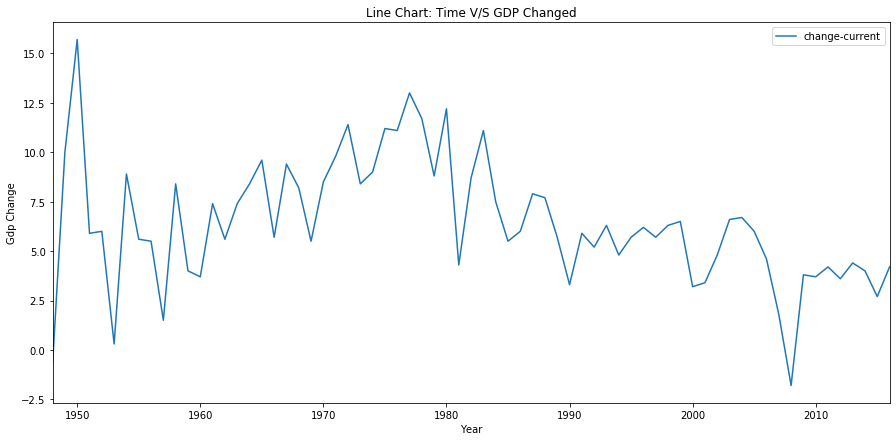

In [57]:
import matplotlib.pyplot as plt
gdp.plot(kind = 'line', x = 'date', y = 'change-current', figsize=(15,7))
plt.title("Line Chart: Time V/S GDP Changed")
plt.xlabel("Year")
plt.ylabel("Gdp Change")
plt.show()

### Bar Chart

AttributeError: module 'matplotlib.dates' has no attribute 'YearlyLocator'

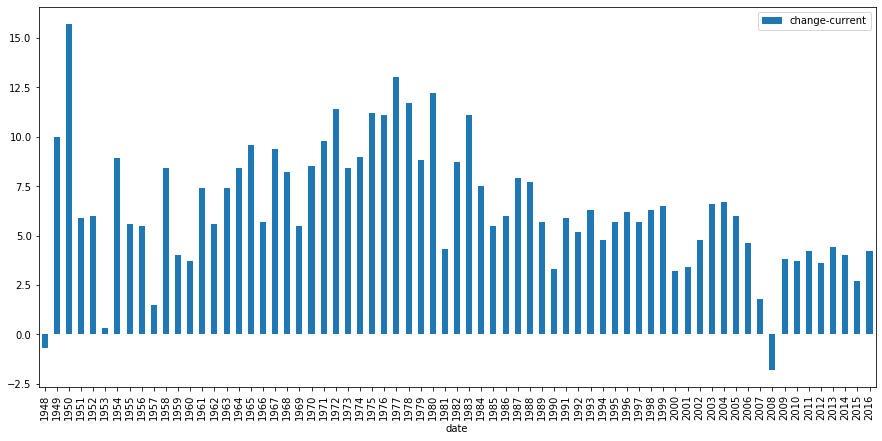

In [58]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

#set date as index
d = gdp.set_index('date')

#plot data
fig, ax = plt.subplots(figsize=(15,7))
d.plot(kind='bar', ax=ax)

#set ticks every year
ax.xaxis.set_major_locator(mdates.YearlyLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

### (ii) Visualize Unemployment Table

### Scatter Plot

### Line Chart

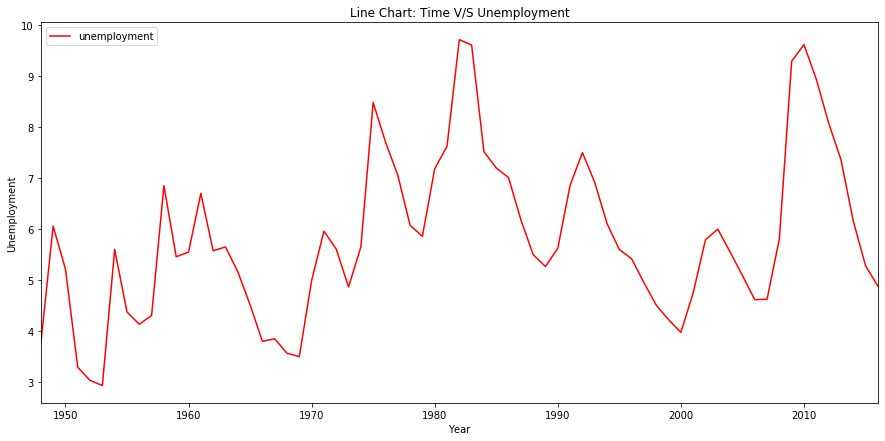

In [78]:
import matplotlib.pyplot as plt
unemployment.plot(kind = 'line', x = 'date', y = 'unemployment', figsize=(15,7), color = 'r')
plt.title("Line Chart: Time V/S Unemployment")
plt.xlabel("Year")
plt.ylabel("Unemployment")
plt.show()

### Bar Chart

AttributeError: module 'matplotlib.dates' has no attribute 'YearlyLocator'

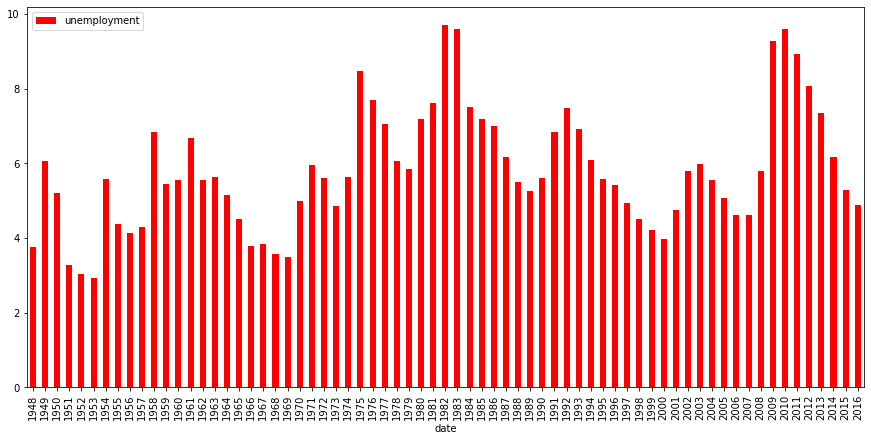

In [60]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

#set date as index
d = unemployment.set_index('date')

#plot data
fig, ax = plt.subplots(figsize=(15,7))
d.plot(kind='bar', ax=ax, color = 'r')

#set ticks every year
ax.xaxis.set_major_locator(mdates.YearlyLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

[Table of Content](#toc)

<a id='l5'></a>
## 5. Comparison between GDP V/S Unemployment

### By using Line Chart

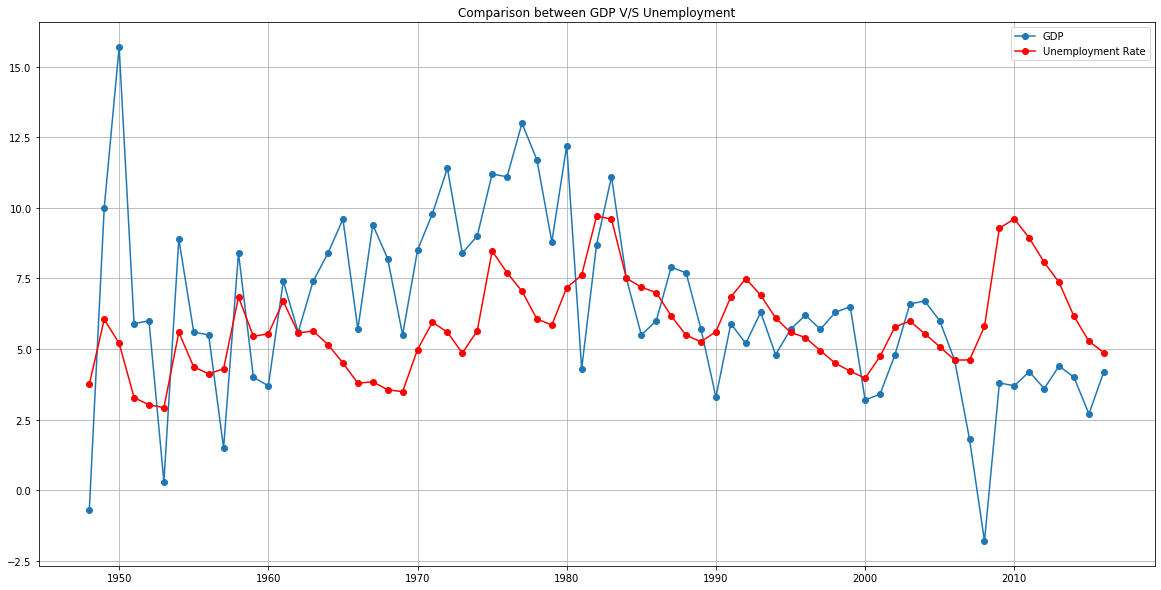

In [61]:
import matplotlib.pyplot as plt
date = gdp['date']
gdp_change = gdp['change-current']
unemployment_rate = unemployment['unemployment']
plt.figure(figsize=(20,10))
plt.plot(date, gdp_change, marker = 'o', label = 'GDP')
plt.plot(date, unemployment_rate, marker = 'o', color = 'r', label = 'Unemployment Rate')
labels = ['GDP', 'Unemployment Rate']
#cubes = [i*i*i for i in numbers]
#plt.plot(numbers, cubes, marker = 'o')
plt.grid()
plt.title("Comparison between GDP V/S Unemployment")
plt.legend(labels)
plt.show()

### By Using Bar Graph

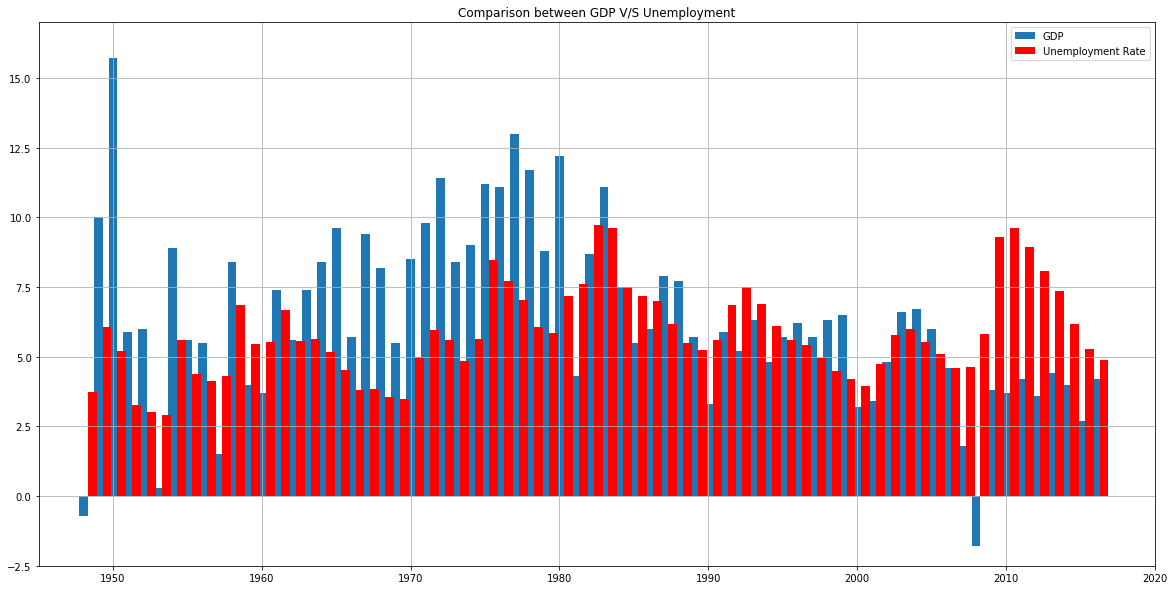

In [62]:
import matplotlib.pyplot as plt
date = gdp['date']
gdp_change = gdp['change-current']
unemployment_rate = unemployment['unemployment']
width = 0.6
plt.figure(figsize=(20,10))
plt.bar(date, gdp_change, label = 'GDP', width = width)
plt.bar(date+width, unemployment_rate, color = 'r', label = 'Unemployment Rate', width = width)
labels = ['GDP', 'Unemployment Rate']
plt.axis([1945, 2020, -2.5, 17])
plt.grid()
plt.legend(labels)
plt.title("Comparison between GDP V/S Unemployment")
plt.show()

[Table of Content](#toc)

<a id='l6'></a>
## 6. Creating Dashboard

In [38]:
import pandas as pd
from bokeh.plotting import figure, output_file, show
def make_dashboard(x, gdp_change, unemployment, title, file_name):
    output_file(file_name)
    p = figure(title=title, x_axis_label='year', y_axis_label='%')
    p.line(x.squeeze(), gdp_change.squeeze(), color="firebrick", line_width=4, legend="GDP")
    p.line(x.squeeze(), unemployment.squeeze(), line_width=4, legend="Unemployment")
    show(p)
    
links={'GDP':'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/projects/coursera_project/clean_gdp.csv',\
       'unemployment':'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/projects/coursera_project/clean_unemployment.csv'}

df_gdp = pd.read_csv(links["GDP"])

# Create your dataframe with column date
x = df_gdp['date']

# Create your dataframe with column change-current
gdp_change = df_gdp['change-current'] 

df_unemp = pd.read_csv(links['unemployment'])

 # Create your dataframe with column unemployment
unemployment = df_unemp['unemployment']
unemployment.head()

title = 'Line Chart: GDP Change V/S Unemployment'# Give your dashboard a string title
file_name = "index.html"
make_dashboard(x=x, gdp_change=gdp_change, unemployment= unemployment, title=title, file_name=file_name)

[Table of Content](#toc)

<a id='conclusion'></a>
## Conclusion
From the above data analysis, we can observe that when GDP goes over the Unemployment rate comes down and when GDP comes down, Unemployment rate goes over. So <b>US Economic Data Analysis </b>concludes that <b>"Uemployment rate is inversely proportional to GDP"</b>
